<a href="https://colab.research.google.com/github/miaamelia12/sklearn-grid-search/blob/main/sklearn_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [3]:
import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = np.array(X)
X = X.reshape(-1,1)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X, y)

Fitting 15 folds for each of 20 candidates, totalling 300 fits
[CV 1/15; 1/20] START C=1, gamma=6, kernel=rbf..................................
[CV 1/15; 1/20] END .C=1, gamma=6, kernel=rbf;, score=-49.785 total time=   0.0s
[CV 2/15; 1/20] START C=1, gamma=6, kernel=rbf..................................
[CV 2/15; 1/20] END .C=1, gamma=6, kernel=rbf;, score=-82.756 total time=   0.0s
[CV 3/15; 1/20] START C=1, gamma=6, kernel=rbf..................................
[CV 3/15; 1/20] END ..C=1, gamma=6, kernel=rbf;, score=-4.993 total time=   0.0s
[CV 4/15; 1/20] START C=1, gamma=6, kernel=rbf..................................
[CV 4/15; 1/20] END .C=1, gamma=6, kernel=rbf;, score=-11.525 total time=   0.0s
[CV 5/15; 1/20] START C=1, gamma=6, kernel=rbf..................................
[CV 5/15; 1/20] END ..C=1, gamma=6, kernel=rbf;, score=-2.886 total time=   0.0s
[CV 6/15; 1/20] START C=1, gamma=6, kernel=rbf..................................
[CV 6/15; 1/20] END ..C=1, gamma=6, kernel=rbf

GridSearchCV(cv=15, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5], 'gamma': [6, 7, 8, 9],
                         'kernel': ['rbf']},
             verbose=13)

In [18]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 5, 'gamma': 6, 'kernel': 'rbf'}


In [14]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=5, gamma=6)

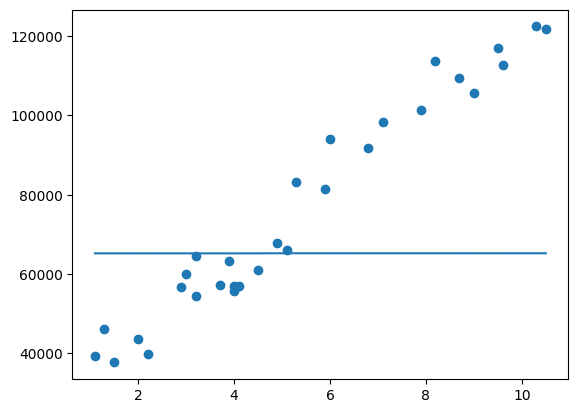

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))